In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib as mpl
import matplotlib.pyplot as plt
import random as rd
#IMPLEMENTED FUNCTIONS
from functions import make_matrix, get_tol_matrix, iteration, dis_algo, print_matrix, get_happiness, get_agents, get_r, save_data, run, get_r_average_sample_circle, sample_circles, get_r_circle, color_map, get_morin_index, average, get_sections, get_morin_index_section

Define system conditions

In [7]:
N       = 50 # MATRIX SIZE
density = 0.9 # POPULATION DENSITY ON LATICE
f1      = 0.7 # STARTING POPULATION PERCENTAGE FOR RED POPULATION
tmin    = 0.1 # MINIMUM TOLERANCE (BORDER CONDITION ON MINIMUM R VALUE)
tmax    = 0.9 # MAXIMUM TOLERANCE (BORDER CONDITION ON MAXIMUM R VALUE)

In [8]:
output = run(N=N, density=density, f1=f1, measure_r_values=True, measure_happiness=True)

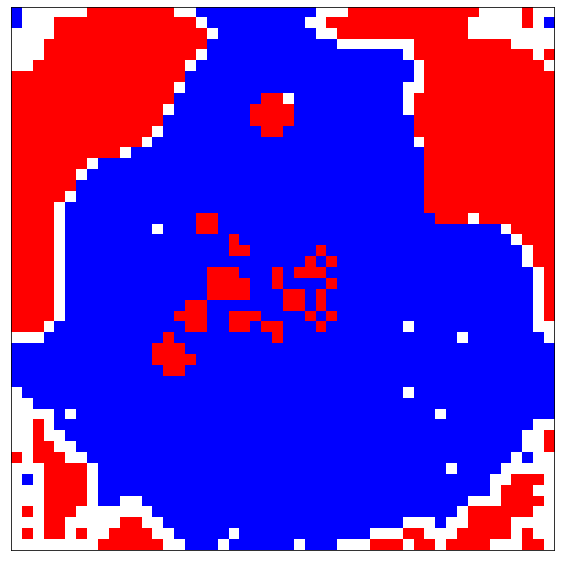

In [9]:
print_matrix(output['matrix'])

# QUANDO NÃO HÁ MINORIA

Skip this

In [7]:
def gauss(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

In [8]:
#(mu_r, sigma_r) = norm.fit(avg_r_red)
#(mu_b, sigma_b) = norm.fit(avg_r_blu)

In [9]:
#n_r, bins, patch = plt.hist(avg_r_red, 40, color='red' , density=True, alpha=0.4)
#n_b, bins, patch = plt.hist(avg_r_blu, 40, color='blue', density=True, alpha=0.4)

#plt.plot(x, max(n_r)*gauss(x, mu_r, sigma_r), '--', color='red')
#plt.plot(x, max(n_b)*gauss(x, mu_b, sigma_b), '--', color='blue')

In [9]:
#data      = [avg_r_red, avg_r_blu]
#save_data(data, 'TLC_50_50.txt')

# FAZENDO VARIAR O VALOR DE f1 POR ITERAÇÃO

In [10]:
tmax = 0.9
tmin = 0.1

f1s = np.linspace(0.01, 0.99, 99)

In [11]:
avg_r_blu_ = list()
avg_r_red_ = list()

for f1 in f1s:
    print('\n' + str(round(f1, 2)) + '/' + '0.99')
    output = run(N=N, density=density, f1=f1, measure_r_values=True, tmax=tmax, tmin=tmin)
    
    avg_r_red_.append(average(output['red_rs'][-1]))
    avg_r_blu_.append(average(output['blu_rs'][-1]))


0.01/0.99
Finished!
0.02/0.99
Finished!
0.03/0.99
Finished!
0.04/0.99
Finished!
0.05/0.99
Finished!
0.06/0.99
Finished!
0.07/0.99
Finished!
0.08/0.99
Finished!
0.09/0.99
Finished!
0.1/0.99
Finished!
0.11/0.99
Finished!
0.12/0.99
Finished!
0.13/0.99
Finished!
0.14/0.99
Finished!
0.15/0.99
Finished!
0.16/0.99
Finished!
0.17/0.99
Finished!
0.18/0.99
Finished!
0.19/0.99
Finished!
0.2/0.99
Finished!
0.21/0.99
Finished!
0.22/0.99
Finished!
0.23/0.99
Finished!
0.24/0.99
Finished!
0.25/0.99
Finished!
0.26/0.99
Finished!
0.27/0.99
Finished!
0.28/0.99
Finished!
0.29/0.99
Finished!
0.3/0.99
Finished!
0.31/0.99
Finished!
0.32/0.99
Finished!
0.33/0.99
Finished!
0.34/0.99
Finished!
0.35/0.99
Finished!
0.36/0.99
Finished!
0.37/0.99
Finished!
0.38/0.99
Finished!
0.39/0.99
Finished!
0.4/0.99
Finished!
0.41/0.99
Finished!
0.42/0.99
Finished!
0.43/0.99
Finished!
0.44/0.99
Finished!
0.45/0.99
Finished!
0.46/0.99
Finished!
0.47/0.99
Finished!
0.48/0.99
Finished!
0.49/0.99
Finished!
0.5/0.99
Finished!
0.51

(0.4, 1.0)

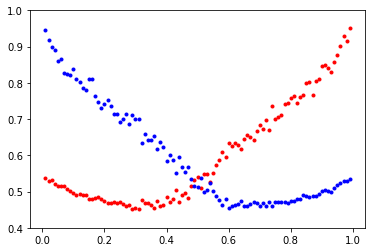

In [12]:
plt.plot(f1s, [r/(get_r(0, 0, N)) for r in avg_r_red_], '.', color='red')
plt.plot(f1s, [r/(get_r(0, 0, N)) for r in avg_r_blu_], '.', color='blue')

plt.ylim(0.4, 1)

In [13]:
avg_sampled_small = sample_circles(N,f1s,density)

In [14]:
r_circle = [get_r_circle(N, density, f1_) for f1_ in f1s]

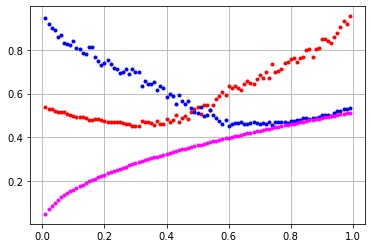

In [17]:
plt.plot(f1s, [r/(get_r(0, 0, N)) for r in avg_r_red_], '.', color='red')
plt.plot(f1s, [r/(get_r(0, 0, N)) for r in avg_r_blu_], '.', color='blue')
#plt.plot(f1s, [2*r/N for r in r_circle], color='green')
plt.plot(f1s, [r/(get_r(0, 0, N)) for r in avg_sampled_small], '.', color='magenta')

#plt.xlim(0.5, 1)
#plt.ylim(0.3, 0.8)
plt.grid()

In [19]:
ratio_sampled = list()
ratio_th = list()

for i in range(len(f1s)):
    ratio_sampled.append(avg_r_blu_[i]/avg_sampled_small[i])
    ratio_th.append(avg_r_blu_[i]/r_circle[i])

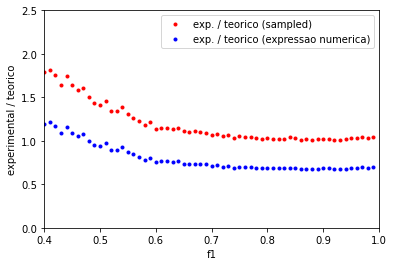

In [20]:
plt.plot(f1s, ratio_sampled, '.', color='red',label="exp. / teorico (sampled)")
plt.plot(f1s, ratio_th, '.', color='blue',label="exp. / teorico (expressao numerica)")

plt.xlim(0.4, 1)
plt.ylim(0, 2.5)

plt.xlabel("f1")
plt.ylabel("experimental / teorico")

plt.legend()

VARIAMOS O INTERVALO DOS VALORES DE T E VEMOS O QUE ACONTECE

In [ ]:
tmax = 0.9
tmin = 0.1

f1s_large = np.linspace(0.01, 0.99, 200)

In [ ]:
avg_r_blu_2 = list()
avg_r_red_2 = list()

for f1 in f1s_large:
    print(str(round(f1, 2)) + '/' + '0.99')
    output = run(N=2*N, density=density, f1=f1, measure_r_values=True, tmax=tmax, tmin=tmin)
    
    avg_r_red_2.append(average(output['red_rs'][-1]))
    avg_r_blu_2.append(average(output['blu_rs'][-1]))

In [ ]:
plt.plot(f1s_large, avg_r_red_2, '.', color='red')
plt.plot(f1s_large, avg_r_blu_2, '.', color='blue')

In [ ]:
plt.plot(f1s_large, [r/(get_r(0, 0, 2*N)) for r in avg_r_red_2], '.', color='red')
plt.plot(f1s_large, [r/(get_r(0, 0, 2*N)) for r in avg_r_blu_2], '.', color='blue')

In [ ]:
avg_sampled = sample_circles(2*N,f1s_large,density)

In [ ]:
r_circle = [get_r_circle(2*N, density, f1_) for f1_ in f1s_large]

In [ ]:
plt.plot(f1s_large, avg_r_red_2, '.', color='red')
plt.plot(f1s_large, avg_r_blu_2, '.', color='blue')
#plt.plot(f1s_large, [get_r_circle(2*N, density, f1_) for f1_ in f1s_large], color='green')
plt.plot(f1s_large, avg_sampled, '.', color='magenta')

#plt.xlim(0.4, 1)
#plt.ylim(10, 60)

In [ ]:
ratio_sampled = list()
ratio_th = list()

for i in range(len(f1s_large)):
    ratio_sampled.append(avg_r_blu_2[i]/avg_sampled[i])
    ratio_th.append(avg_r_blu_2[i]/r_circle[i])

In [ ]:
plt.plot(f1s_large, ratio_sampled, '.', color='red',label="exp. / teorico (sampled)")
plt.plot(f1s_large, ratio_th, '.', color='blue',label="exp. / teorico (expressao numerica)")

plt.xlim(0.5, 1)
plt.ylim(0.2, 1.7)

plt.xlabel("f1")
plt.ylabel("experimental / teorico")

plt.legend()
plt.grid()

In [ ]:
plt.plot(f1s_large, [r/(get_r(0, 0, 2*N)) for r in avg_r_red_2], '.', color='red')
plt.plot(f1s_large, [r/(get_r(0, 0, 2*N)) for r in avg_r_blu_2], '.', color='blue')
plt.plot(f1s_large, [r/(get_r(0, 0, 2*N)) for r in avg_sampled], '.', color='magenta')

#plt.xlim(0, 1)
#plt.ylim(0, 3)
plt.grid()

**DIFERENTES DENSIDADES**

In [8]:
tmax = 0.9
tmin = 0.1

f1s_ = np.linspace(0.01, 0.99, 100)
ds_ = np.linspace(0.3, 0.98, 100)

d_reds = list()
d_blues = list()

for d in ds_:
    print("d: " + str(round(d, 2)) + '/' + '0.98')
    avg_r_blu_d = list()
    avg_r_red_d = list()
    
    for f1 in f1s_:
        #print("> f1) " + str(round(f1, 2)) + '/' + '0.99',end='\r')
        output = run(N=N, density=d, f1=f1, measure_r_values=True, tmax=tmax, tmin=tmin)
    
        avg_r_red_d.append(average(output['red_rs'][-1]))
        avg_r_blu_d.append(average(output['blu_rs'][-1]))
    
    d_reds.append(avg_r_red_d)
    d_blues.append(avg_r_blu_d)

d: 0.3/0.98
d: 0.31/0.98
d: 0.31/0.98
d: 0.32/0.98
d: 0.33/0.98
d: 0.33/0.98
d: 0.34/0.98
d: 0.35/0.98
d: 0.35/0.98
d: 0.36/0.98
d: 0.37/0.98
d: 0.38/0.98
d: 0.38/0.98
d: 0.39/0.98
d: 0.4/0.98
d: 0.4/0.98
d: 0.41/0.98
d: 0.42/0.98
d: 0.42/0.98
d: 0.43/0.98
d: 0.44/0.98
d: 0.44/0.98
d: 0.45/0.98
d: 0.46/0.98
d: 0.46/0.9800
d: 0.47/0.98
d: 0.48/0.98
d: 0.49/0.98
d: 0.49/0.98
d: 0.5/0.98
d: 0.51/0.98
d: 0.51/0.98
d: 0.52/0.98
d: 0.53/0.9800
d: 0.53/0.98
d: 0.54/0.98
d: 0.55/0.98
d: 0.55/0.98
d: 0.56/0.98
d: 0.57/0.9800
d: 0.57/0.98
d: 0.58/0.98
d: 0.59/0.98
d: 0.6/0.98
d: 0.6/0.98
d: 0.61/0.98
d: 0.62/0.98
d: 0.62/0.98
d: 0.63/0.98
d: 0.64/0.98
d: 0.64/0.98
d: 0.65/0.98
d: 0.66/0.98
d: 0.66/0.98
d: 0.67/0.98
d: 0.68/0.98
d: 0.68/0.98
d: 0.69/0.98
d: 0.7/0.98
d: 0.71/0.98
d: 0.71/0.98
d: 0.72/0.98
d: 0.73/0.98
d: 0.73/0.98
d: 0.74/0.98
d: 0.75/0.98
d: 0.75/0.9800
d: 0.76/0.98
d: 0.77/0.98
d: 0.77/0.9800
d: 0.78/0.98
d: 0.79/0.98
d: 0.79/0.98
d: 0.8/0.98
d: 0.81/0.98
d: 0.82/0.98
d: 0.82/0.

In [30]:
from matplotlib import animation as ani
%matplotlib notebook

In [68]:
def build_plots(i):
    plt.cla()
    plt.ylabel('average radius')
    plt.xlabel('f1')
    plt.xlim(0,1)
    plt.ylim(0.2,1)
    plt.text(0.45,0.8,"d = " + str(round(ds_[i], 3)))
    plt.plot(f1s_, [r/(get_r(0, 0, N)) for r in d_reds[i]], '.', color='red',scaley=False, scalex=False)
    plt.plot(f1s_, [r/(get_r(0, 0, N)) for r in d_blues[i]], '.', color='blue',scaley=False, scalex=False)

<IPython.core.display.Javascript object>


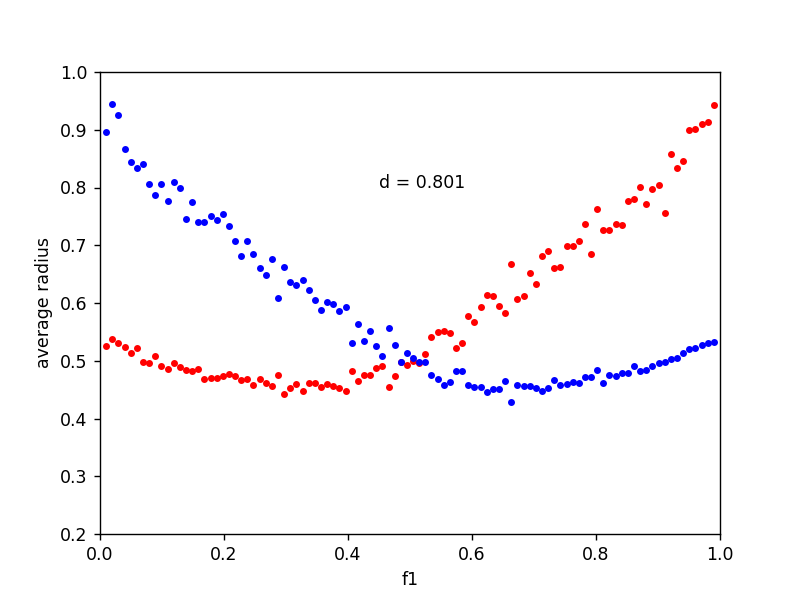

MovieWriter Pillow unavailable; using Pillow instead.


In [72]:
color = ['red', 'blue']
fig = plt.figure()
plt.ylabel('average radius')
plt.xlabel('f1')
plt.xlim(0,1)
plt.ylim(0.2,1)
plt.grid()

animator = ani.FuncAnimation(fig, build_plots, interval = 100, frames=len(d_reds))
plt.show()
animator.save("d.gif", writer="Pillow")

In [169]:
N       = 100 # MATRIX SIZE
density = 0.9 # POPULATION DENSITY ON LATICE
f1      = 0.4 # STARTING POPULATION PERCENTAGE FOR RED POPULATION
tmin    = 0.3 # MINIMUM TOLERANCE (BORDER CONDITION ON MAXIMUM R VALUE)
tmax    = 0.7 # MAXIMUM TOLERANCE (BORDER CONDITION ON MINIMUM R VALUE)

In [170]:
def draw_matrix_animation(frame,*fargs):
    
    matrix_ = fargs[0]
    tol_matrix = fargs[1]
    im = fargs[2]
    
    color_map = {-1: np.array([255, 0, 0]), # red
             0: np.array([255, 255, 255]), # green
             1: np.array([0, 0, 255])} # blue
    
    N_ = len(matrix_)
    
    new_matrix = iteration(matrix_, dis_algo, tol_matrix)
    
    matrix_ = new_matrix.copy()

    if new_matrix == "STOP":
        plt.text(0.5,0.5,"Done!")
             
    data_3d_ = np.ndarray(shape=(N_, N_, 3), dtype=int)
    for i in range(0, N):
        for j in range(0, N):
            data_3d_[i][j] = color_map[new_matrix[i][j]]

    #ax.cla()
    
    im.set_data(data_3d_)
    #frame_text = plt.text(1.15,1.15,"t = " + str(frame))
    ax.set_xticks([])
    ax.set_yticks([])
    #plt.show()

In [171]:
def init_draw_iterations(matrix_,tol_matrix,im):
    #N_ = len(matrix_)
    
    #color_map = {-1: np.array([255, 0, 0]), # red
             #0: np.array([255, 255, 255]), # green
             #1: np.array([0, 0, 255])} # blue
        
    #data_3d = np.ndarray(shape=(N_, N_, 3), dtype=int)
    #for i in range(0, N):
        #for j in range(0, N):
            #data_3d[i][j] = color_map[matrix_[i][j]]

    #im.set_data(data_3d)
    
    print("Initializing...")

<IPython.core.display.Javascript object>


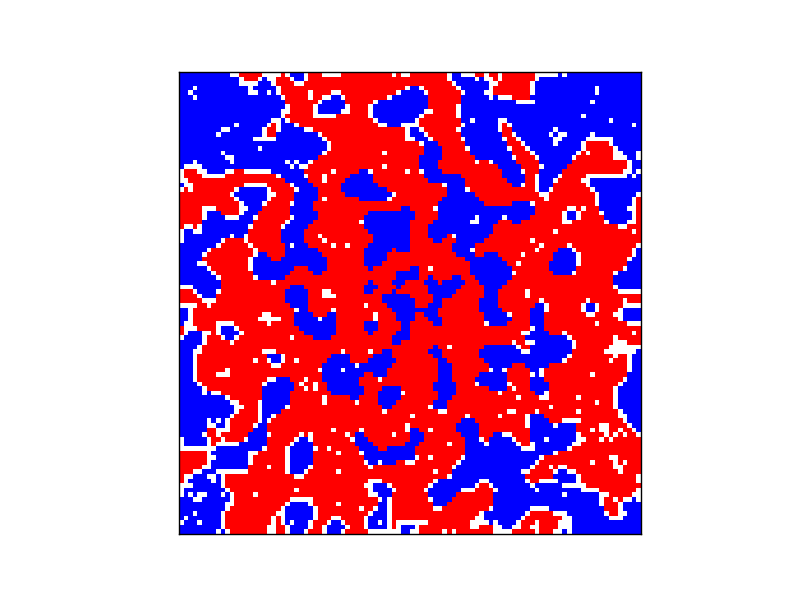

Initializing...


In [173]:
fig_anim = plt.figure()

ax = fig_anim.add_subplot(1, 1, 1)
ax.set_xticks([])
ax.set_yticks([])

matrix_    = make_matrix(N, density, f1)
tol_matrix = get_tol_matrix(N, tmax=tmax, tmin=tmin)
#print_matrix(matrix_)

N_ = len(matrix_)
data_3d = np.ndarray(shape=(N_, N_, 3), dtype=int)
for i in range(0, N):
        for j in range(0, N):
            data_3d[i][j] = color_map[matrix_[i][j]]
im = ax.imshow(data_3d)
#frame_text = plt.text(1.15,1.15,"t = " + str(0))

animator = ani.FuncAnimation(fig_anim, draw_matrix_animation, init_func = init_draw_iterations(matrix_,tol_matrix,im), fargs = [matrix_,tol_matrix,im], interval = 100, frames=200)
plt.show()
#animator.save("sim.gif", writer="Pillow")

**TESTE DE MORIN INDEX**

In [16]:
N       = 100 # MATRIX SIZE
density = 0.9 # POPULATION DENSITY ON LATICE
f1      = 0.7 # STARTING POPULATION PERCENTAGE FOR RED POPULATION
tmin    = 0.2 # MINIMUM TOLERANCE (BORDER CONDITION ON MAXIMUM R VALUE)
tmax    = 0.8 # MAXIMUM TOLERANCE (BORDER CONDITION ON MINIMUM R VALUE)

In [17]:
output = run(N=N, density=density, f1=f1, tmin=tmin, tmax=tmax, measure_r_values=False, measure_happiness=True, measure_morin=True, n_iter = 300)

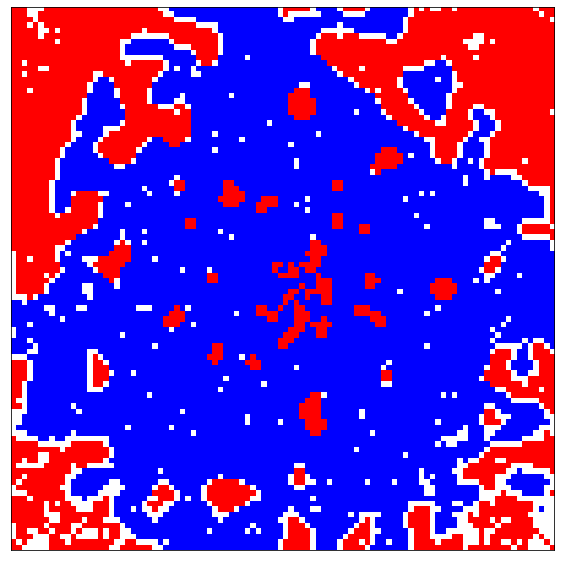

In [18]:
print_matrix(output['matrix'])

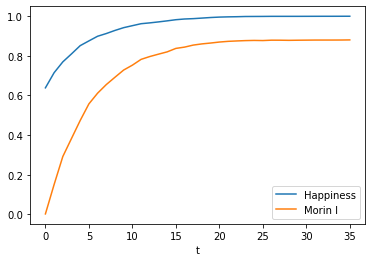

In [19]:
plt.plot(output['happiness'],label="Happiness")
plt.plot(output['morin'],label="Morin I")
plt.xlabel("t")
plt.legend()

In [15]:
sections = get_sections(output['matrix'], r1=N/8, r2=N/4, r3=3.5*N/8)

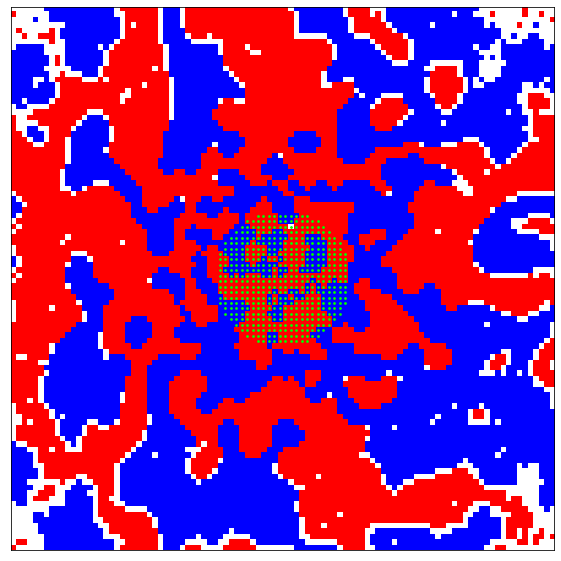

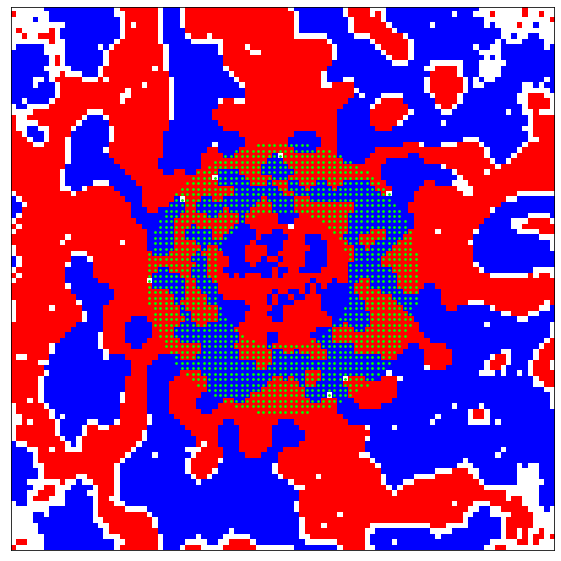

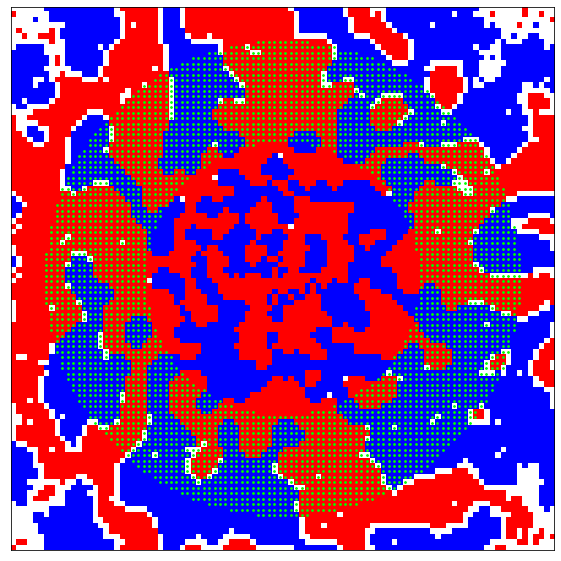

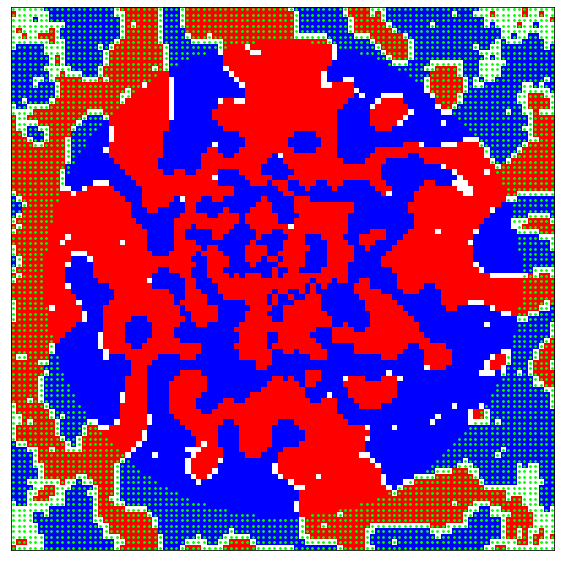

In [38]:
for i in range(4):
    print_matrix(output['matrix'], marker=sections[i])

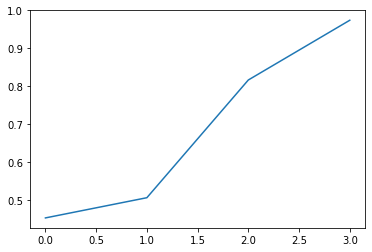

In [21]:
morin_sections = list()
for section in sections:
    morin_sections.append(get_morin_index_section(output['matrix'], section))
    
plt.plot(morin_sections)

(array([ 3.,  9., 12., 20., 13.,  9., 16.,  8.,  6.,  4.]),
 array([-0.01138141, -0.00889206, -0.0064027 , -0.00391335, -0.001424  ,
         0.00106536,  0.00355471,  0.00604406,  0.00853342,  0.01102277,
         0.01351212]),
 <BarContainer object of 10 artists>)

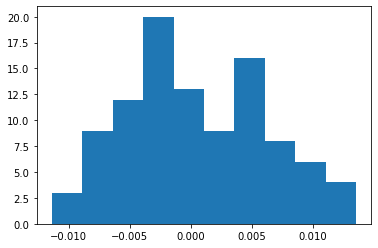

In [10]:
indexes = list()
for i in range(100):
    matrix_test = make_matrix(100,0.9,0.9)
        
    indexes.append(get_morin_index(matrix_test))
    print(str(i+1) + '/' + str(100), end='\r')
    
plt.hist(indexes)

DIFERENTES F1S

In [35]:
N       = 50 # MATRIX SIZE
density = 0.6 # POPULATION DENSITY ON LATICE
tmax = 0.9
tmin = 0.1
f1 = 0.7

ts = np.linspace(0.01, 0.99, 99)

In [40]:
morans = list()
happiness = list()

for t in ts:
    print(str(round(t, 2)) + '/' + '0.99')
    output = run(N=N, density=density, f1=f1, measure_morin=True, measure_happiness=True, tmax=t, tmin=t)
    
    morans.append(output['morin'][-1])
    happiness.append(output['happiness'][-1])

0.01/0.99
0.02/0.99
0.03/0.99
0.04/0.99
0.05/0.99
0.06/0.99
0.07/0.99
0.08/0.99
0.09/0.99
0.1/0.99!
0.11/0.99
0.12/0.99
0.13/0.99
0.14/0.99
0.15/0.99
0.16/0.99
0.17/0.99
0.18/0.99
0.19/0.99
0.2/0.99!
0.21/0.99
0.22/0.99
0.23/0.99
0.24/0.99
0.25/0.99
0.26/0.99
0.27/0.99
0.28/0.99
0.29/0.99
0.3/0.99!
0.31/0.99
0.32/0.99
0.33/0.99
0.34/0.99
0.35/0.99
0.36/0.99
0.37/0.99
0.38/0.99
0.39/0.99
0.4/0.99!
0.41/0.99
0.42/0.99
0.43/0.99
0.44/0.99
0.45/0.99
0.46/0.99
0.47/0.99
0.48/0.99
0.49/0.99
0.5/0.99!
0.51/0.99
0.52/0.99
0.53/0.99
0.54/0.99
0.55/0.99
0.56/0.99
0.57/0.99
0.58/0.99
0.59/0.99
0.6/0.99!
0.61/0.99
0.62/0.99
0.63/0.99
0.64/0.99
0.65/0.99
0.66/0.99
0.67/0.99
0.68/0.99
0.69/0.99
0.7/0.99!
0.71/0.99
0.72/0.99
0.73/0.99
0.74/0.99
0.75/0.99
0.76/0.99
0.77/0.99
0.78/0.99
0.79/0.99
0.8/0.99!
0.81/0.99
0.82/0.99
0.83/0.99
0.84/0.99
0.85/0.99
0.86/0.99
0.87/0.99
0.88/0.99
0.89/0.99
0.9/0.99!
0.91/0.99
0.92/0.99
0.93/0.99
0.94/0.99
0.95/0.99
0.96/0.99
0.97/0.99
0.98/0.99
0.99/0.99


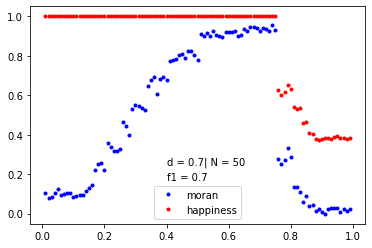

In [47]:
plt.plot(ts, morans, '.', color='blue',label="moran")
plt.plot(ts, happiness, '.', color='red',label="happiness")
plt.text(0.4,0.25,"d = " + str(density) + "| N = " + str(N))
plt.text(0.4,0.17,"f1 = " + str(f1))
plt.legend()
#plt.vlines(1/8,0,1)
#plt.vlines(2/8,0,1)
#plt.vlines(3/8,0,1)
#plt.vlines(4/8,0,1)
#plt.vlines(5/8,0,1)
#plt.vlines(6/8,0,1)
#plt.vlines(7/8,0,1)

**ESTUDAR INFLUENCIA DE TOLERANCIA DEPENDENTE DE R (vs. não dependente de r) c/ MORAN INDEX**

In [43]:
N       = 50 # MATRIX SIZE
density = 0.7 # POPULATION DENSITY ON LATICE
#tmax = 7/8
tmin = 4/8
f1 = 0.65

ts = np.linspace(tmin, 7/8, 100)

In [31]:
sections = get_sections(make_matrix(N,density,f1), r1=N/8, r2=N/4, r3=3.5*N/8)

In [44]:
morans = list()
happiness = list()
moran_sections = list()
    
for t in ts:
    print(str(round(t, 2)) + '/' + str(round(7/8,2)))
    output = run(N=N, density=density, f1=f1, measure_morin=True, measure_happiness=True, tmax=t, tmin=tmin)
    
    moran_sections_temp = list()
    
    for section in sections:
        moran_sections_temp.append(get_morin_index_section(output['matrix'], section))
        
    moran_sections.append(moran_sections_temp)
    morans.append(output['morin'][-1])
    happiness.append(output['happiness'][-1])

0.5/0.88
0.5/0.88!
0.51/0.88
0.51/0.88
0.52/0.88
0.52/0.88
0.52/0.88
0.53/0.88
0.53/0.88
0.53/0.88
0.54/0.88
0.54/0.88
0.55/0.88
0.55/0.88
0.55/0.88
0.56/0.88
0.56/0.88
0.56/0.88
0.57/0.88
0.57/0.88
0.58/0.88
0.58/0.88
0.58/0.88
0.59/0.88
0.59/0.88
0.59/0.88
0.6/0.88!
0.6/0.88!
0.61/0.88
0.61/0.88
0.61/0.88
0.62/0.88
0.62/0.88
0.62/0.88
0.63/0.88
0.63/0.88
0.64/0.88
0.64/0.88
0.64/0.88
0.65/0.88
0.65/0.88
0.66/0.88
0.66/0.88
0.66/0.88
0.67/0.88
0.67/0.88
0.67/0.88


ZeroDivisionError: float division by zero

Text(0, 0.5, 'moran')

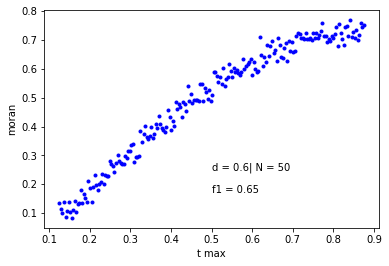

In [34]:
plt.plot(ts, morans, '.', color='blue')
#plt.plot(ts, happiness, '.', color='red',label="happiness")
plt.text(0.5,0.25,"d = " + str(density) + "| N = " + str(N))
plt.text(0.5,0.17,"f1 = " + str(f1))
plt.xlabel("t max")
plt.ylabel("moran")

In [ ]:
plt.plot(ts, [moran_sections[i][0] for i in range(len(moran_sections))], '.', color='blue',label="Section 0")
plt.plot(ts, [moran_sections[i][1] for i in range(len(moran_sections))], '.', color='green',label="Section 1")
plt.plot(ts, [moran_sections[i][2] for i in range(len(moran_sections))], '.', color='orange',label="Section 2")
plt.plot(ts, [moran_sections[i][3] for i in range(len(moran_sections))], '.', color='red',label="Section 3")
plt.plot(ts, morans, '.', color='black')
plt.legend()
plt.xlabel("t max")
plt.ylabel("moran")
plt.text(0.11,0.64,"t min = " + str(tmin))
plt.text(0.11,0.57,"d = " + str(density) + "| N = " + str(N))
plt.text(0.11,0.50,"f1 = " + str(f1))

MORAN BY SECTION

In [74]:
N       = 50 # MATRIX SIZE
density = 0.8 # POPULATION DENSITY ON LATICE
f1      = 0.7 # STARTING POPULATION PERCENTAGE FOR RED POPULATION
tmin    = 0.1 # MINIMUM TOLERANCE (BORDER CONDITION ON MAXIMUM R VALUE)
tmax    = 0.9 # MAXIMUM TOLERANCE (BORDER CONDITION ON MINIMUM R VALUE)

In [75]:
sections = get_sections(make_matrix(N,density,f1), r1=N/8, r2=N/4, r3=3.5*N/8)

In [76]:
morin_sections = list()

for i in range(200):
    print(str(i) + '/' + str(200))
    output = run(N=N, density=density, f1=f1, tmin=tmin, tmax=tmax, measure_r_values=False, measure_happiness=True, measure_morin=True, n_iter = 300)

    morin_sections_temp = list()
    for section in sections:
        morin_sections_temp.append(get_morin_index_section(output['matrix'], section))
        
    morin_sections.append(morin_sections_temp)
    

0/200
1/200hed!
2/200hed!
3/200hed!
4/200hed!
5/200hed!
6/200hed!
7/200hed!
8/200hed!
9/200hed!
10/200ed!
11/200ed!
12/200ed!
13/200ed!
14/200ed!
15/200ed!
16/200ed!
17/200ed!
18/200ed!
19/200ed!
20/200ed!
21/200ed!
22/200ed!
23/200ed!
24/200ed!
25/200ed!
26/200ed!
27/200ed!
28/200ed!
29/200ed!
30/200ed!
31/200ed!
32/200ed!
33/200ed!
34/200ed!
35/200ed!
36/200ed!
37/200ed!
38/200ed!
39/200ed!
40/200ed!
41/200ed!
42/200ed!
43/200ed!
44/200ed!
45/200ed!
46/200ed!
47/200ed!
48/200ed!
49/200ed!
50/200ed!
51/200ed!
52/200ed!
53/200ed!
54/200ed!
55/200ed!
56/200ed!
57/200ed!
58/200ed!
59/200ed!
60/200ed!
61/200ed!
62/200ed!
63/200ed!
64/200ed!
65/200ed!
66/200ed!
67/200ed!
68/200ed!
69/200ed!
70/200ed!
71/200ed!
72/200ed!
73/200ed!
74/200ed!
75/200ed!
76/200ed!
77/200ed!
78/200ed!
79/200ed!
80/200ed!
81/200ed!
82/200ed!
83/200ed!
84/200ed!
85/200ed!
86/200ed!
87/200ed!
88/200ed!
89/200ed!
90/200ed!
91/200ed!
92/200ed!
93/200ed!
94/200ed!
95/200ed!
96/200ed!
97/200ed!
98/200ed!
99/200ed!
100/

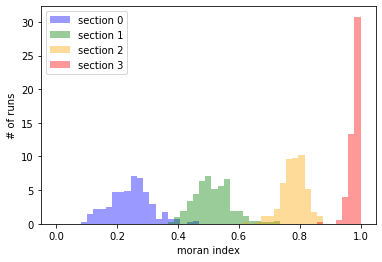

In [79]:
bins = np.linspace(0, 1, 50)

plt.hist([morin_sections[i][0] for i in range(len(morin_sections))], bins=bins, color='blue' , density=True, alpha=0.4, label="section 0")
plt.hist([morin_sections[i][1] for i in range(len(morin_sections))], bins=bins, color='green' , density=True, alpha=0.4, label="section 1")
plt.hist([morin_sections[i][2] for i in range(len(morin_sections))], bins=bins, color='orange' , density=True, alpha=0.4, label="section 2")
plt.hist([morin_sections[i][3] for i in range(len(morin_sections))], bins=bins, color='red' , density=True, alpha=0.4, label="section 3")
#plt.xlim(0.65,1)
plt.xlabel("moran index")
plt.ylabel("# of runs")
plt.legend()

MORAN VS. DENSITY (p/ diferentes f1 > 50%)

In [95]:
N       = 100 # MATRIX SIZE
#density = 0.8 # POPULATION DENSITY ON LATICE
#f1      = 0.7 # STARTING POPULATION PERCENTAGE FOR RED POPULATION
tmin    = 0.1 # MINIMUM TOLERANCE (BORDER CONDITION ON MAXIMUM R VALUE)
tmax    = 0.9 # MAXIMUM TOLERANCE (BORDER CONDITION ON MINIMUM R VALUE)

ds = np.linspace(0.2, 0.95, 100)
f1s = np.linspace(0.5, 0.9, 5)

In [96]:
morans = list()
i = 0

for f1 in f1s:
    morans_by_d = list()
    
    for d in ds:
        print(str(i) + '/' + str(500))
        output = run(N=N, density=d, f1=f1, tmin=tmin, tmax=tmax, measure_r_values=False, measure_happiness=False, measure_morin=True, n_iter = 300)
        morans_by_d.append(output['morin'][-1])
        i += 1
        
    morans.append(morans_by_d)

0/500
1/500hed!
2/500hed!
3/500hed!
4/500hed!
5/500hed!
6/500hed!
7/500hed!
8/500hed!
9/500hed!
10/500ed!
11/500ed!
12/500ed!
13/500ed!
14/500ed!
15/500ed!
16/500ed!
17/500ed!
18/500ed!
19/500ed!
20/500ed!
21/500ed!
22/500ed!
23/500ed!
24/500ed!
25/500ed!
26/500ed!
27/500ed!
28/500ed!
29/500ed!
30/500ed!
31/500ed!
32/500ed!
33/500ed!
34/500ed!
35/500ed!
36/500ed!
37/500ed!
38/500ed!
39/500ed!
40/500ed!
41/500ed!
42/500ed!
43/500ed!
44/500ed!
45/500ed!
46/500ed!
47/500ed!
48/500ed!
49/500ed!
50/500ed!
51/500ed!
52/500ed!
53/500ed!
54/500ed!
55/500ed!
56/500ed!
57/500ed!
58/500ed!
59/500ed!
60/500ed!
61/500ed!
62/500ed!
63/500ed!
64/500ed!
65/500ed!
66/500ed!
67/500ed!
68/500ed!
69/500ed!
70/500ed!
71/500ed!
72/500ed!
73/500ed!
74/500ed!
75/500ed!
76/500ed!
77/500ed!
78/500ed!
79/500ed!
80/500ed!
81/500ed!
82/500ed!
83/500ed!
84/500ed!
85/500ed!
86/500ed!
87/500ed!
88/500ed!
89/500ed!
90/500ed!
91/500ed!
92/500ed!
93/500ed!
94/500ed!
95/500ed!
96/500ed!
97/500ed!
98/500ed!
99/500ed!
100/

Text(0, 0.5, 'moran index')

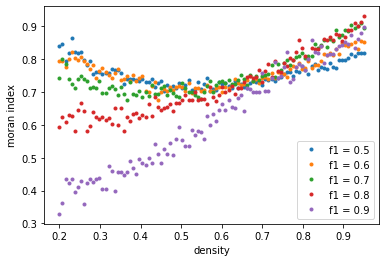

In [97]:
for j in range(5):
    plt.plot(ds, [morans[j][i] for i in range(len(morans[j]))], '.', label="f1 = " + str(f1s[j]))
plt.legend()
plt.xlabel("density")
plt.ylabel("moran index")